**1. Environment Setup and Libraries Installation**

Installation of necessary Python libraries such as rasterio, numpy, matplotlib, and earthpy for raster data handling, numerical computations, and plotting.

In [ ]:
pip install rasterio numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 35.9 MB/s eta 0:00:00


**2. Importing Required Libraries**

earthpy and rasterio libraries are used for handling spatial data and performing various spatial operations.

matplotlib is used for plotting the data.

numpy is used for numerical operations on arrays.

The np.seterr line is used to suppress any divide-by-zero and invalid operation warnings.

In [ ]:
!pip install earthpy
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

np.seterr(divide='ignore', invalid='ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.0 MB/s eta 0:00:00


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

**3. Loading and Reading the Bands**

Each band is loaded using rasterio.open()

Reading Bands as Arrays

Each band is read as a NumPy array of float32 type to perform numerical computations.

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load Bands
band2 = rasterio.open('Landsat8_Godavari_2014_SR_B2.tif')  # Blue band
band3 = rasterio.open('Landsat8_Godavari_2014_SR_B3.tif')  # Green band
band4 = rasterio.open('Landsat8_Godavari_2014_SR_B4.tif')  # Red band
band5 = rasterio.open('Landsat8_Godavari_2014_SR_B5.tif')  # NIR band
band6 = rasterio.open('Landsat8_Godavari_2014_SR_B6.tif')  # SWIR1 band
band7 = rasterio.open('Landsat8_Godavari_2014_SR_B7.tif')  # SWIR2 band

# Read bands as arrays
b2 = band2.read(1).astype('float32')
b3 = band3.read(1).astype('float32')
b4 = band4.read(1).astype('float32')
b5 = band5.read(1).astype('float32')
b6 = band6.read(1).astype('float32')
b7 = band7.read(1).astype('float32')

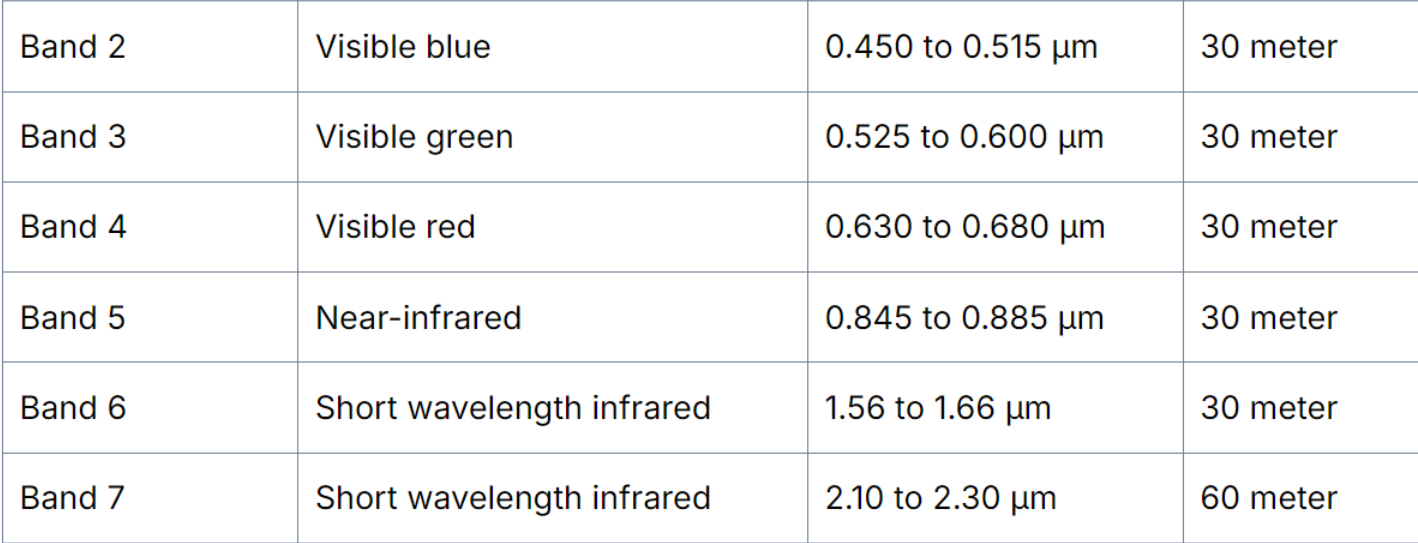

**4. Stacking Bands for Visualization**

All the bands are stacked into a single 3D array (arr_bef) for visualization purposes.

In [ ]:
l=[]
l.append(b2)
l.append(b3)
l.append(b4)
l.append(b5)
l.append(b6)
l.append(b7)
arr_bef = np.stack(l)
arr_bef.shape

(6, 499, 480)

**5. Visualizing Bands Using earthpy**

The earthpy library is used to visualize all the bands using different color maps.

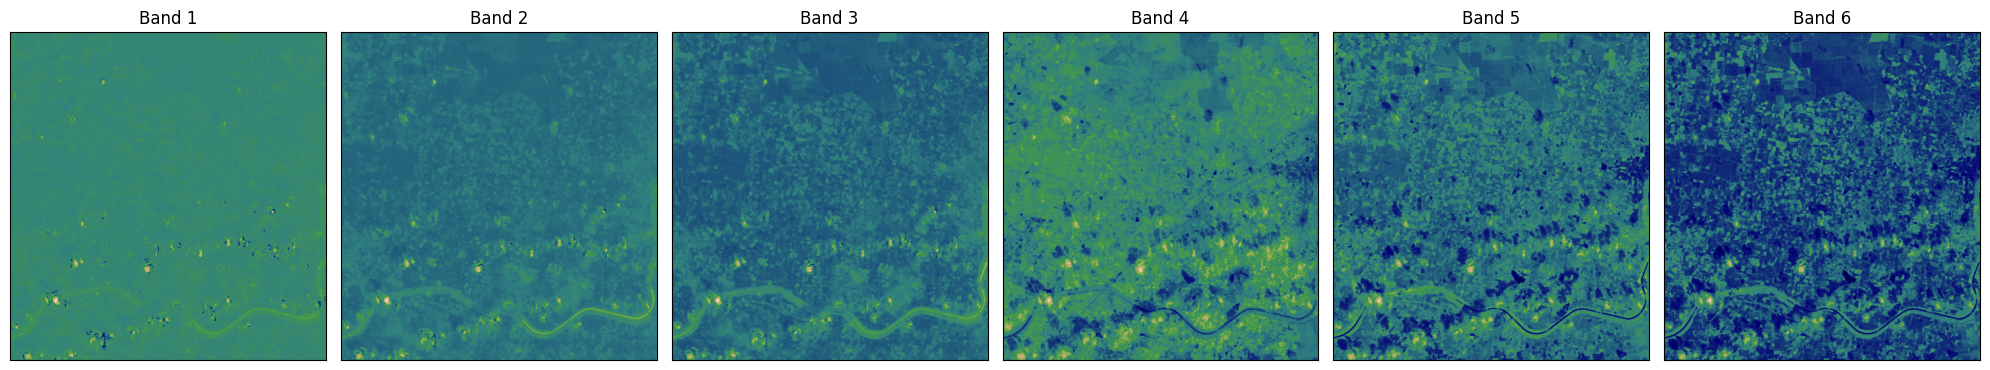

In [ ]:
ep.plot_bands(arr_bef, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

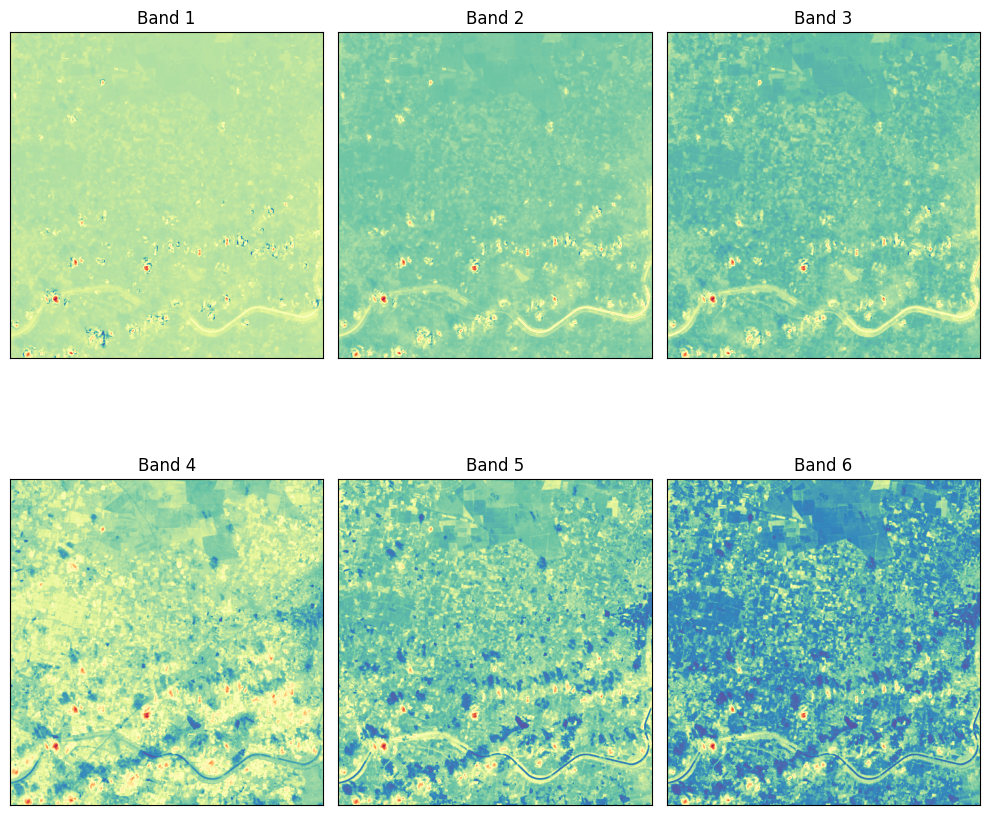

In [ ]:
ep.plot_bands(arr_bef, cmap='Spectral_r', cols=3, figsize=(10, 10), cbar=False)

plt.show()

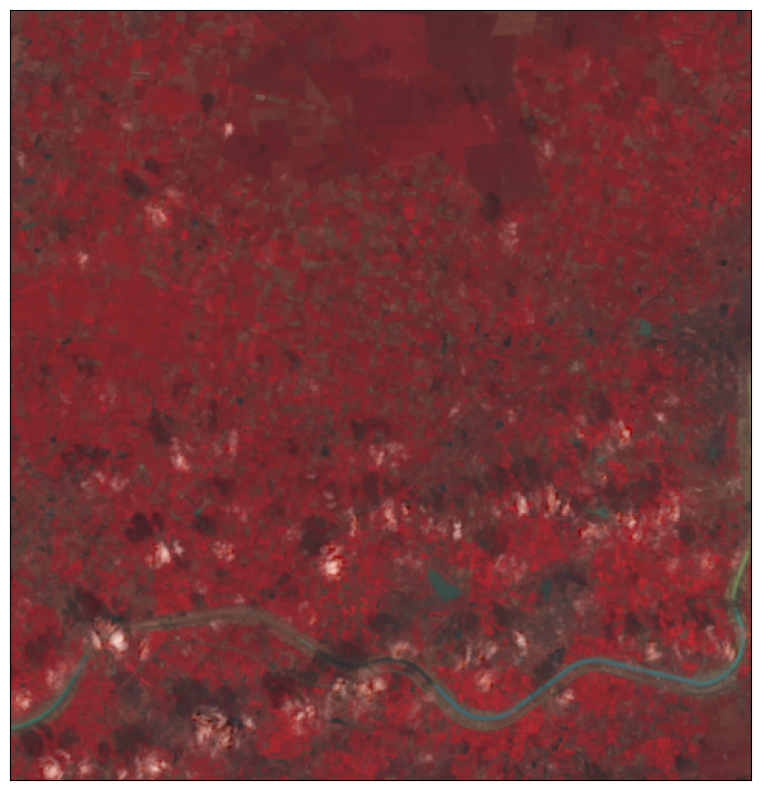

In [ ]:
ep.plot_rgb(arr_bef, rgb=(3, 2, 1), figsize=(10, 10))

plt.show()

**6. Computing Different Indices**

Each index is plotted using matplotlib with color maps to visualize urbanization and vegetation.

A small constant (1e-10) is added to avoid division by zero errors.

NDVI measures vegetation health by comparing the difference between NIR (Band 5) and Red (Band 4) bands.

Values:

High (0.2 to 0.9): Healthy vegetation.

Low (0 to 0.2): Sparse vegetation.

Negative: Non-vegetated areas.

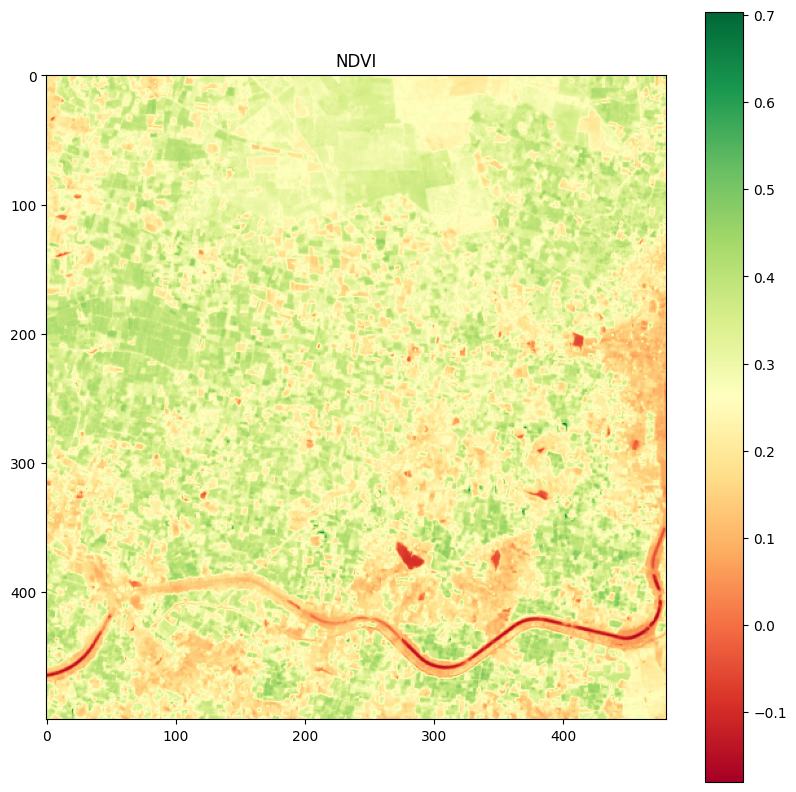

In [ ]:
ndvi = (b5 - b4) / (b5 + b4 + 1e-10)

# Display NDVI
plt.figure(figsize=(10, 10))
plt.imshow(ndvi, cmap='RdYlGn')  # Red-to-Green color map
plt.colorbar()
plt.title('NDVI')
plt.show()

NDBI detects built-up areas by comparing SWIR1 (Band 6) and NIR (Band 5) bands.

Values:

High (0.2 to 0.8): Urban areas.

Low (0 to -0.2): Non-urban areas.

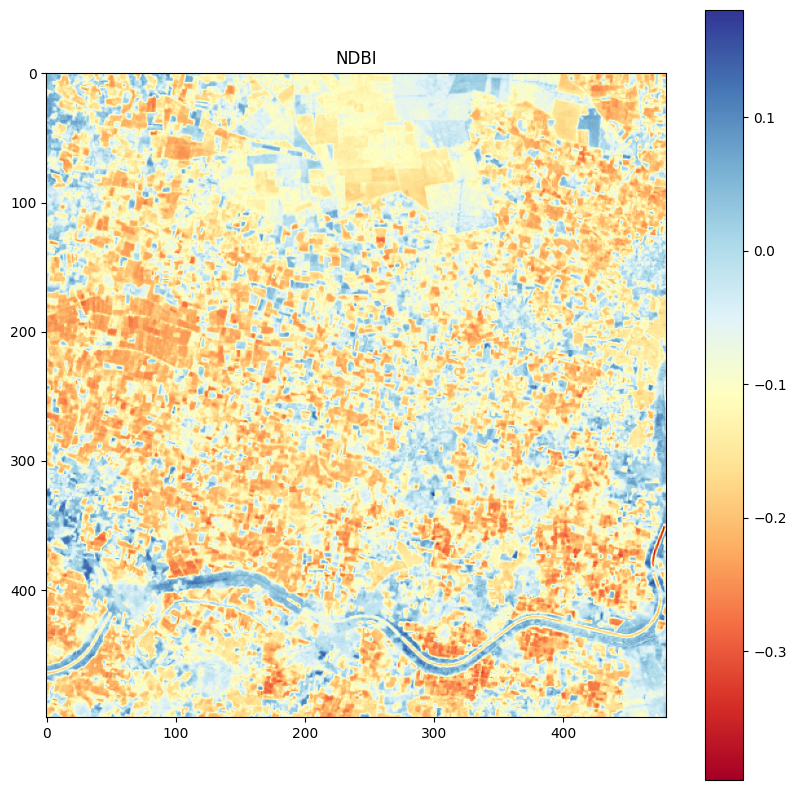

In [ ]:
# Avoid division by zero
ndbi = (b6 - b5) / (b6 + b5 + 1e-10)

# Display NDBI
plt.figure(figsize=(10, 10))
plt.imshow(ndbi, cmap='RdYlBu')  # Red-to-Blue color map
plt.colorbar()
plt.title('NDBI')
plt.show()

MNDWI enhances water bodies by comparing Green (Band 3) and SWIR1 (Band 6) bands.

Values:

High (0.2 to 0.9): Water bodies.

Low (0 to -0.2): Land.


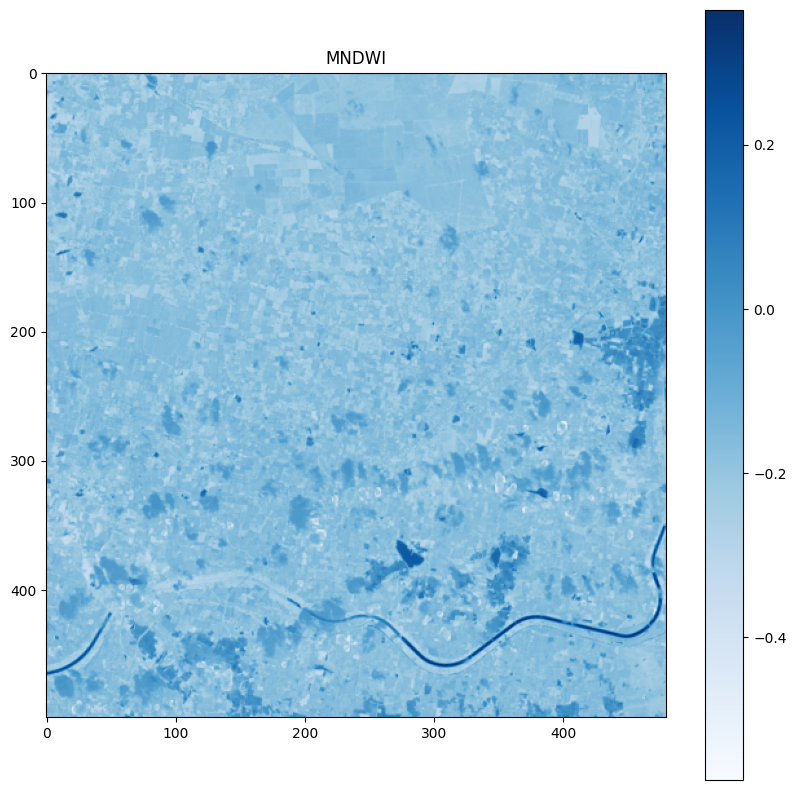

In [ ]:
# Avoid division by zero
mndwi = (b3 - b6) / (b3 + b6 + 1e-10)

# Display MNDWI
plt.figure(figsize=(10, 10))
plt.imshow(mndwi, cmap='Blues')  # Blue color map
plt.colorbar()
plt.title('MNDWI')
plt.show()


BAEI differentiates bare soil from vegetation using SWIR1 (Band 6), SWIR2 (Band 7), and NIR (Band 5).

Values:

High: Bare earth.

Low: Vegetation or urban areas.

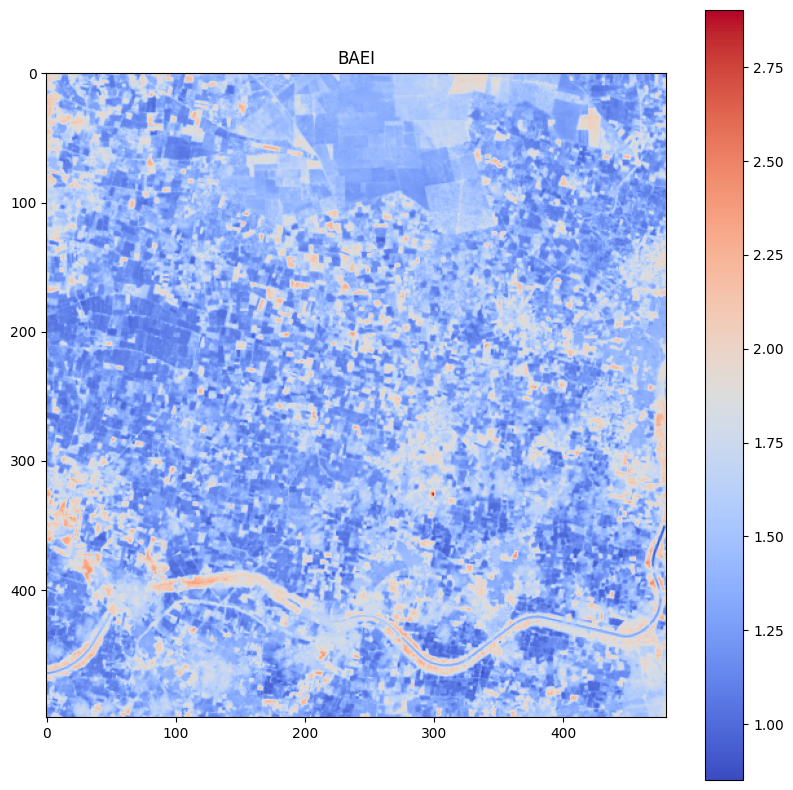

In [ ]:
baei = (b6 + b7) / (b5 + 1e-10)

# Display BAEI
plt.figure(figsize=(10, 10))
plt.imshow(baei, cmap='coolwarm')  # Custom color map
plt.colorbar()
plt.title('BAEI')
plt.show()

UI is similar to NDBI but specifically enhances urban features by comparing SWIR1 and NIR bands.

Values:

High (0.2 to 0.8): Urban areas.

Low (0 to -0.2): Non-urban areas.

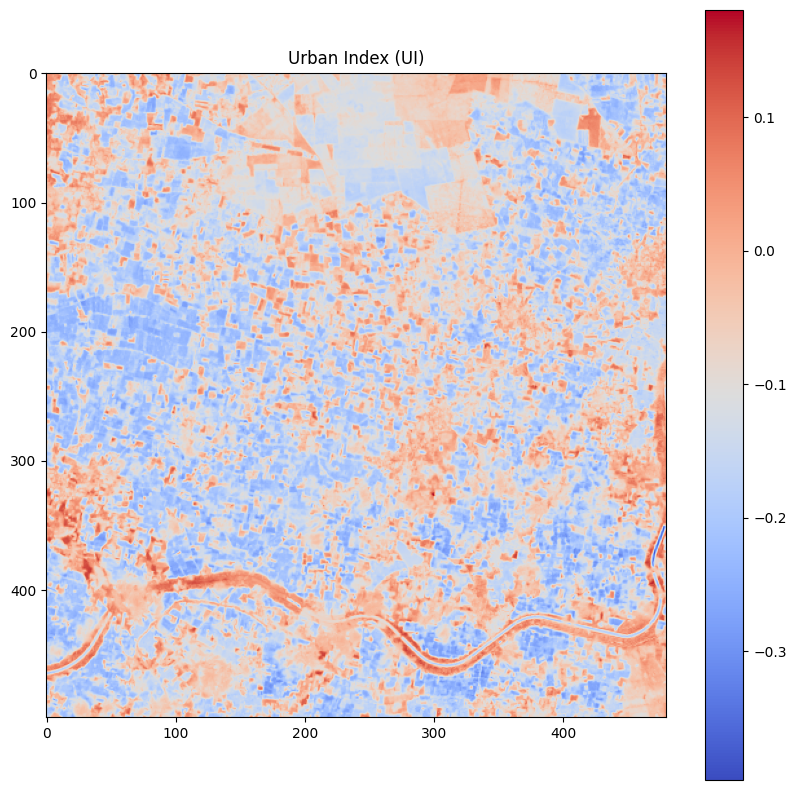

In [ ]:
# Assuming b5 (NIR), b6 (SWIR1), and other required bands are already defined and imported

# Calculate the Urban Index (UI)
ui = (b6 - b5) / (b6 + b5 + 1e-10)  # Adding a small number to avoid division by zero

# Display the Urban Index (UI)
plt.figure(figsize=(10, 10))
plt.imshow(ui, cmap='coolwarm')  # Using the 'coolwarm' colormap for visualization
plt.colorbar()
plt.title('Urban Index (UI)')
plt.show()

**7. Applying K-means Clustering to Identify Urban and Non-Urban Areas:**

KMeans (from sklearn.cluster): An unsupervised learning algorithm used for clustering.

Matplotlib (matplotlib.pyplot): Used for plotting graphs and visualizing results.

Seaborn (seaborn): A data visualization library based on Matplotlib, used for setting plot styles.

Defines a range of years from 2014 to 2024 to analyze the satellite data.

**Compute Indices**: computes several indices used for land cover analysis.

**Reading Image Bands and Computing Indices**:

The computed indices are stored in the indices_data dictionary, where each year is a key, and the values are dictionaries containing the computed indices.

**Preparing Data for Clustering:**

For each year, the code flattens the computed index arrays and stacks them together. The flatten() method converts 2D arrays into 1D arrays.

All stacked data from different years are then vertically concatenated into a single NumPy array called all_indices.

**Clustering with K-means:**

K-means clustering is performed on the combined data (all_indices) to classify pixels into two clusters: Urban and Non-Urban.

kmeans.fit_predict() computes the clusters and returns the cluster labels for each pixel.

**Reshape Cluster Labels to Image Dimensions:**

The cluster labels are reshaped back into the original image dimensions for each year, which allows us to identify which pixels are classified as urban (cluster 1) or non-urban (cluster 0).

**Calculating Year-to-Year and Cumulative Urbanization Changes:**

**Cumulative Changes from Base Year (2014):**

Calculates the percentage of urban pixels (classified as 1) for each year relative to the total pixels.

Computes cumulative change from the base year (2014) and stores the results.

**Year-to-Year Changes**

Computes the percentage change in urbanization from one year to the next and stores these values.

**Display Results :**

Prints the year-to-year and cumulative changes in urbanization as percentages.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Year-to-Year Urbanization Changes:
Urbanization change from 2014 to 2015: -3.29%
Urbanization change from 2015 to 2016: 4.17%
Urbanization change from 2016 to 2017: 4.71%
Urbanization change from 2017 to 2018: -14.29%
Urbanization change from 2018 to 2019: 6.70%
Urbanization change from 2019 to 2020: -8.52%
Urbanization change from 2020 to 2021: 10.31%
Urbanization change from 2021 to 2022: -0.90%
Urbanization change from 2022 to 2023: 27.43%
Urbanization change from 2023 to 2024: 6.03%

Cumulative Urbanization Changes from 2014:
Urbanization change from 2014 to 2014: 0.00%
Urbanization change from 2014 to 2015: -3.29%
Urbanization change from 2014 to 2016: 0.87%
Urbanization change from 2014 to 2017: 5.58%
Urbanization change from 2014 to 2018: -8.71%
Urbanization change from 2014 to 2019: -2.01%
Urbanization change from 2014 to 2020: -10.53%
Urbanization change from 2014 to 2021: -0.22%
Urbanization change from 2014 to 2022: -1.12%
Urbanization change from 2014 to 2023: 26.30%
Urban

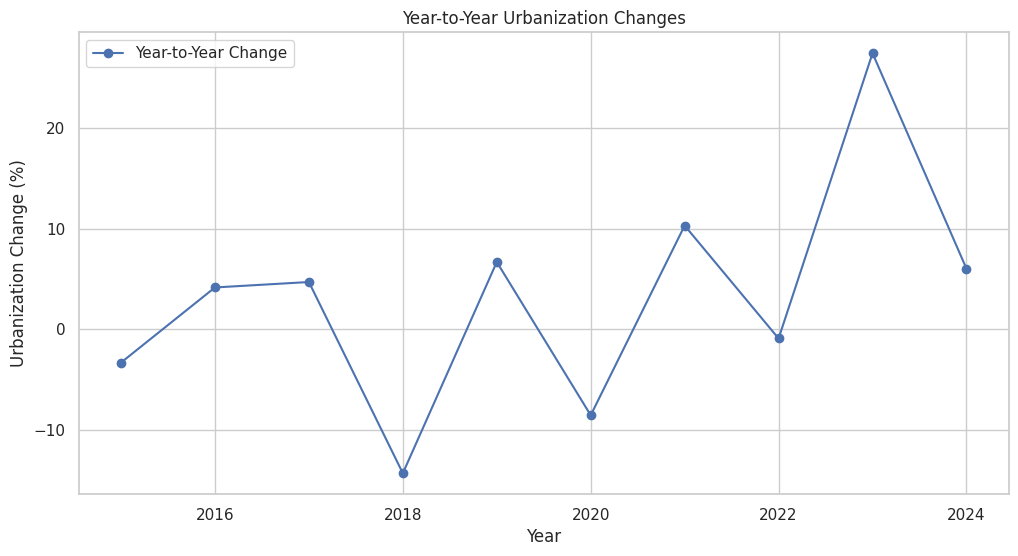

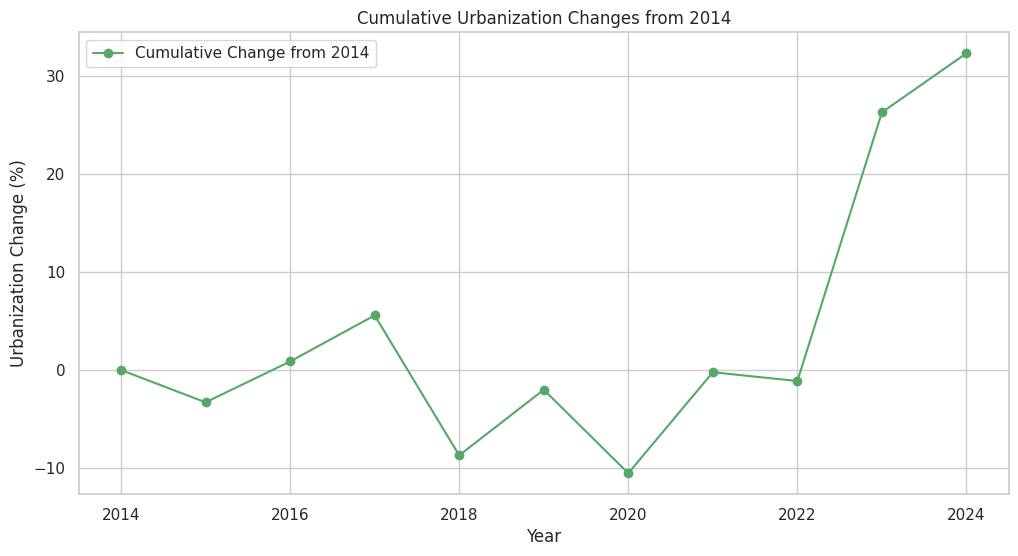

In [ ]:
import numpy as np
import rasterio
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# List of years
years = range(2014, 2025)

# Function to compute indices
def compute_indices(b2, b3, b4, b5, b6, b7):
    # NDVI calculation
    ndvi = (b5 - b4) / (b5 + b4 + 1e-10)
    # NDBI calculation
    ndbi = (b6 - b5) / (b6 + b5 + 1e-10)
    # MNDWI calculation
    mndwi = (b3 - b6) / (b3 + b6 + 1e-10)
    # BAEI calculation
    baei = (b6 + b7) / (b5 + 1e-10)
    # Urban Index (UI) calculation
    ui = (b6 - b5) / (b6 + b5 + 1e-10)
    return ndvi, ndbi, mndwi, baei, ui

# Initialize dictionaries to store indices
indices_data = {}

# Compute indices for each year and store them
for year in years:
    # Load Bands
    band2 = rasterio.open(f'Landsat8_Godavari_{year}_SR_B2.tif')  # Blue band
    band3 = rasterio.open(f'Landsat8_Godavari_{year}_SR_B3.tif')  # Green band
    band4 = rasterio.open(f'Landsat8_Godavari_{year}_SR_B4.tif')  # Red band
    band5 = rasterio.open(f'Landsat8_Godavari_{year}_SR_B5.tif')  # NIR band
    band6 = rasterio.open(f'Landsat8_Godavari_{year}_SR_B6.tif')  # SWIR1 band
    band7 = rasterio.open(f'Landsat8_Godavari_{year}_SR_B7.tif')  # SWIR2 band

    # Read bands as arrays
    b2 = band2.read(1).astype('float32')
    b3 = band3.read(1).astype('float32')
    b4 = band4.read(1).astype('float32')
    b5 = band5.read(1).astype('float32')
    b6 = band6.read(1).astype('float32')
    b7 = band7.read(1).astype('float32')

    # Compute indices
    ndvi, ndbi, mndwi, baei, ui = compute_indices(b2, b3, b4, b5, b6, b7)

    # Store the computed indices
    indices_data[year] = {
        'NDVI': ndvi,
        'NDBI': ndbi,
        'MNDWI': mndwi,
        'BAEI': baei,
        'UI': ui
    }

# Prepare data for clustering
all_indices = []

for year in years:
    data = np.stack([
        indices_data[year]['NDVI'].flatten(),
        indices_data[year]['NDBI'].flatten(),
        indices_data[year]['MNDWI'].flatten(),
        indices_data[year]['BAEI'].flatten(),
        indices_data[year]['UI'].flatten()
    ], axis=1)

    all_indices.append(data)

# Convert list to a numpy array
all_indices = np.vstack(all_indices)

# Unsupervised Learning: K-means Clustering
kmeans = KMeans(n_clusters=2, random_state=0)  # 2 clusters: Urban and Non-Urban
kmeans_labels = kmeans.fit_predict(all_indices)

# Reshape labels back to image dimensions
urban_areas = {}
for i, year in enumerate(years):
    reshaped_labels = kmeans_labels[i * data.shape[0]:(i + 1) * data.shape[0]].reshape(indices_data[year]['NDVI'].shape)
    urban_areas[year] = reshaped_labels

# Calculate Year-to-Year Urbanization Change
urban_change_percentages_relative = []
urban_change_percentages_cumulative = []
base_year = 2014
base_urban_area = np.sum(urban_areas[base_year] == 1)
total_pixels = urban_areas[base_year].size

# Calculate cumulative changes from the base year (2014)
for year in years:
    urban_area = np.sum(urban_areas[year] == 1)
    urban_percentage = (urban_area / total_pixels) * 100
    base_urban_percentage = (base_urban_area / total_pixels) * 100
    change_percentage = urban_percentage - base_urban_percentage
    urban_change_percentages_cumulative.append((year, change_percentage))

# Calculate relative changes year-to-year
for i in range(1, len(years)):
    year1 = years[i - 1]
    year2 = years[i]

    urban_area_1 = np.sum(urban_areas[year1] == 1)
    urban_area_2 = np.sum(urban_areas[year2] == 1)

    total_pixels = urban_areas[year1].size

    urban_percentage_1 = (urban_area_1 / total_pixels) * 100
    urban_percentage_2 = (urban_area_2 / total_pixels) * 100

    change_percentage = urban_percentage_2 - urban_percentage_1
    urban_change_percentages_relative.append((year1, year2, change_percentage))

# Display Results
print("\nYear-to-Year Urbanization Changes:")
for year1, year2, change in urban_change_percentages_relative:
    print(f"Urbanization change from {year1} to {year2}: {change:.2f}%")

print("\nCumulative Urbanization Changes from 2014:")
for year, change in urban_change_percentages_cumulative:
    print(f"Urbanization change from 2014 to {year}: {change:.2f}%")

# Setting the style for the plots
sns.set(style="whitegrid")

# Prepare data for Year-to-Year Urbanization Changes
years_relative = [year2 for year1, year2, _ in urban_change_percentages_relative]
changes_relative = [change for _, _, change in urban_change_percentages_relative]

# Prepare data for Cumulative Urbanization Changes from Base Year (2014)
years_cumulative = [year for year, _ in urban_change_percentages_cumulative]
changes_cumulative = [change for _, change in urban_change_percentages_cumulative]

# Plot Year-to-Year Urbanization Changes
plt.figure(figsize=(12, 6))
plt.plot(years_relative, changes_relative, marker='o', linestyle='-', color='b', label='Year-to-Year Change')

# Add title and labels
plt.title('Year-to-Year Urbanization Changes')
plt.xlabel('Year')
plt.ylabel('Urbanization Change (%)')

# Display grid and legend
plt.grid(True)
plt.legend()

# Show plot
plt.show()

# Plot Cumulative Urbanization Changes from 2014
plt.figure(figsize=(12, 6))
plt.plot(years_cumulative, changes_cumulative, marker='o', linestyle='-', color='g', label='Cumulative Change from 2014')

# Add title and labels
plt.title('Cumulative Urbanization Changes from 2014')
plt.xlabel('Year')
plt.ylabel('Urbanization Change (%)')

# Display grid and legend
plt.grid(True)
plt.legend()

# Show plot
plt.show()

**8. Cluster Visualization for Selected Years:**

Takes a year, urban_areas dictionary, title, and color map (cmap) as inputs.

Visualizes the clustered image using plt.imshow() with appropriate labels, color bars, and titles.

**Visualize Urban and Non-Urban Areas for 2014 and 2023:**

Calls the plot_clustered_areas() function to visualize the urban and non-urban areas for the years 2014 and 2023.

It uses the 'RdYlGn' color map to differentiate between urban and non-urban areas, showing how urban areas have changed over time.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


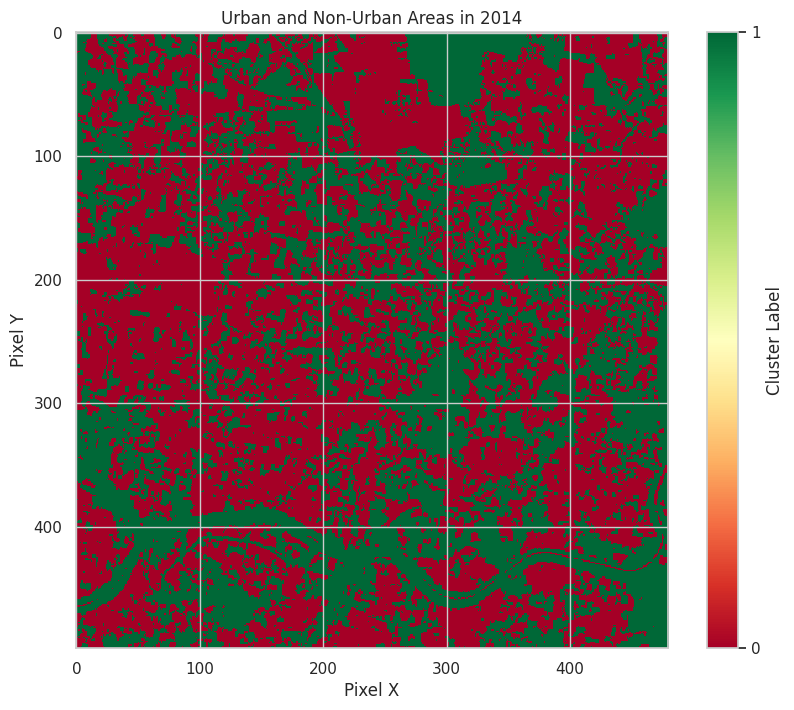

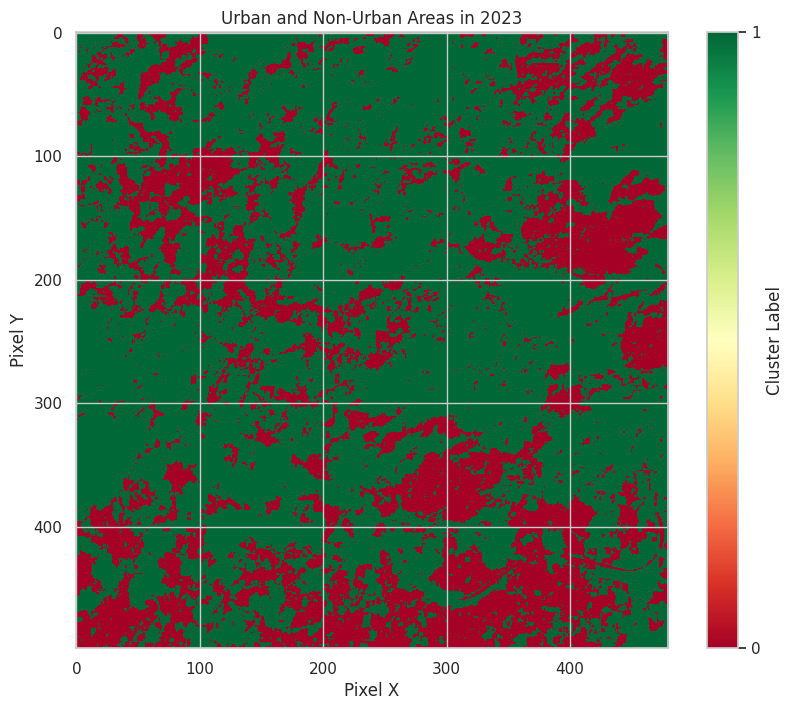

In [ ]:
import numpy as np
import rasterio
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# List of years
years = range(2014, 2025)

# Function to compute indices
def compute_indices(b2, b3, b4, b5, b6, b7):
    # NDVI calculation
    ndvi = (b5 - b4) / (b5 + b4 + 1e-10)
    # NDBI calculation
    ndbi = (b6 - b5) / (b6 + b5 + 1e-10)
    # MNDWI calculation
    mndwi = (b3 - b6) / (b3 + b6 + 1e-10)
    # BAEI calculation
    baei = (b6 + b7) / (b5 + 1e-10)
    # Urban Index (UI) calculation
    ui = (b6 - b5) / (b6 + b5 + 1e-10)
    return ndvi, ndbi, mndwi, baei, ui

# Initialize dictionaries to store indices
indices_data = {}

# Compute indices for each year and store them
for year in years:
    # Load Bands
    band2 = rasterio.open(f'Landsat8_Godavari_{year}_SR_B2.tif')  # Blue band
    band3 = rasterio.open(f'Landsat8_Godavari_{year}_SR_B3.tif')  # Green band
    band4 = rasterio.open(f'Landsat8_Godavari_{year}_SR_B4.tif')  # Red band
    band5 = rasterio.open(f'Landsat8_Godavari_{year}_SR_B5.tif')  # NIR band
    band6 = rasterio.open(f'Landsat8_Godavari_{year}_SR_B6.tif')  # SWIR1 band
    band7 = rasterio.open(f'Landsat8_Godavari_{year}_SR_B7.tif')  # SWIR2 band

    # Read bands as arrays
    b2 = band2.read(1).astype('float32')
    b3 = band3.read(1).astype('float32')
    b4 = band4.read(1).astype('float32')
    b5 = band5.read(1).astype('float32')
    b6 = band6.read(1).astype('float32')
    b7 = band7.read(1).astype('float32')

    # Compute indices
    ndvi, ndbi, mndwi, baei, ui = compute_indices(b2, b3, b4, b5, b6, b7)

    # Store the computed indices
    indices_data[year] = {
        'NDVI': ndvi,
        'NDBI': ndbi,
        'MNDWI': mndwi,
        'BAEI': baei,
        'UI': ui
    }

# Prepare data for clustering
all_indices = []

for year in years:
    data = np.stack([
        indices_data[year]['NDVI'].flatten(),
        indices_data[year]['NDBI'].flatten(),
        indices_data[year]['MNDWI'].flatten(),
        indices_data[year]['BAEI'].flatten(),
        indices_data[year]['UI'].flatten()
    ], axis=1)

    all_indices.append(data)

# Convert list to a numpy array
all_indices = np.vstack(all_indices)

# Unsupervised Learning: K-means Clustering
kmeans = KMeans(n_clusters=2, random_state=0)  # 2 clusters: Urban and Non-Urban
kmeans_labels = kmeans.fit_predict(all_indices)

# Reshape labels back to image dimensions
urban_areas = {}
for i, year in enumerate(years):
    reshaped_labels = kmeans_labels[i * data.shape[0]:(i + 1) * data.shape[0]].reshape(indices_data[year]['NDVI'].shape)
    urban_areas[year] = reshaped_labels

# Cluster Visualization for Selected Years
def plot_clustered_areas(year, urban_areas, title, cmap):
    clustered_image = urban_areas[year]

    # Plotting the clustered result
    plt.figure(figsize=(10, 8))
    plt.imshow(clustered_image, cmap=cmap, interpolation='nearest')
    plt.colorbar(label='Cluster Label', ticks=[0, 1], format='%d')
    plt.title(title)
    plt.xlabel('Pixel X')
    plt.ylabel('Pixel Y')
    plt.show()

# Visualize urban and non-urban areas for 2014 and 2023
plot_clustered_areas(2014, urban_areas, title='Urban and Non-Urban Areas in 2014', cmap='RdYlGn')
plot_clustered_areas(2023, urban_areas, title='Urban and Non-Urban Areas in 2023', cmap='RdYlGn')

**9. Future Prediction using ARIMA model:**

**statsmodels.tsa.arima.model.ARIMA**: A library for statistical modeling in Python, specifically used here for fitting an ARIMA (AutoRegressive Integrated Moving Average) model to time series data.

**Created a Data Dictionary for Urbanization Area Data:**

This dictionary contains data from 2015 to 2024 with corresponding "area of urbanization" values for each year.

The values in the area_of_urbanization list represent the changes or indices in the area of urbanization over these years.

Created a DataFrame from the Dictionary

**Setting the Year as the Index for Time Series Modeling:**

The 'year' column is set as the index of the DataFrame. This is important for time series modeling because the ARIMA model will use the year as the time index to fit the model and make forecasts

**Fitting the ARIMA Model:**

ARIMA (AutoRegressive Integrated Moving Average) is a popular model used for time series forecasting.

The order parameter (p, d, q) defines:

p (AutoRegressive part): Number of lag observations included.

d (Integrated part): Number of times the raw observations are differenced.

q (Moving Average part): Number of lagged forecast errors in the prediction equation.

(1, 1, 1) is a common starting point for ARIMA models:

p=1: Uses one lag of past values.

d=1: The data is differenced once to make it stationary.

q=1: Uses one lag of past errors.

model.fit() fits the ARIMA model to the data and returns a model object model_fit containing the estimated coefficients and other diagnostic information.

**Forecasting the Next 6 Years (2025 to 2030):**

The forecast method is used to predict the next 6 time points (years in this case). This generates forecasts for 2025, 2026, 2027, 2028, 2029, and 2030 based on the fitted ARIMA model.

**Plotting the Original Data and Forecasted Values:**

The original "area of urbanization" data from 2015 to 2024 is plotted using df['area_of_urbanization'].plot() with a label "Actual Data".

The forecasted values for 2025 to 2030 are plotted on the same graph using plt.plot(), marked with red dots (marker='o') and a dashed line (linestyle='--').

Title, X-axis, and Y-axis labels are added for better visualization and understanding.

plt.legend() adds a legend to differentiate between actual data and forecasted values.

plt.show() displays the plot.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results w

10    24.022775
11     8.951431
12    21.575688
13    11.001192
14    19.858740
15    12.439364
Name: predicted_mean, dtype: float64


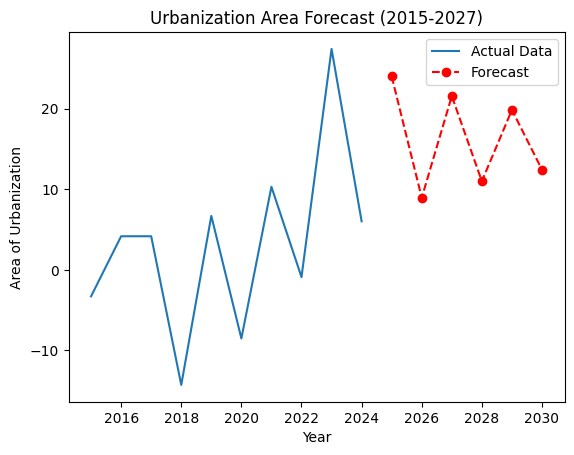

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Data: Years 2015 to 2024 and corresponding area of urbanization values
data = {
    'year': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'area_of_urbanization': [-3.29, 4.17, 4.17, -14.29, 6.70, -8.52, 10.31, -0.90, 27.43, 6.03]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set the year as the index for time series modeling
df.set_index('year', inplace=True)

# Fit ARIMA model (order p=1, d=1, q=1 is a common starting point)
model = ARIMA(df['area_of_urbanization'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next 3 years (2025, 2026, 2027)
forecast = model_fit.forecast(steps=6)

# Print the forecasted values
print(forecast)

# Plot the original data and forecasted values
df['area_of_urbanization'].plot(label='Actual Data', legend=True)
plt.plot([2025, 2026, 2027,2028,2029,2030], forecast, label='Forecast', marker='o', linestyle='--', color='red')
plt.title("Urbanization Area Forecast (2015-2027)")
plt.xlabel("Year")
plt.ylabel("Area of Urbanization")
plt.legend()
plt.show()

**Creating a DataFrame for Urbanization Changes:**

The code creates a DataFrame urban_change_df using pandas from a variable called urban_change_percentages, which is expected to be a list of lists or tuples. Each entry should contain:

Year1: The starting year.

Year2: The ending year.

Change: The percentage change in urbanization between Year1 and Year2.

The DataFrame will have three columns: 'Year1', 'Year2', and 'Change'.

**Creating Lagged Features for Time Series Forecasting:**

A new column Lag_1 is created, which contains the Change column values shifted by one row. This lagged feature is helpful for time series forecasting as it allows the model to use past data to predict future changes.

urban_change_df.dropna(inplace=True) removes the first row, which will have a NaN value for Lag_1 since there is no prior data for the first entry.

**Defining Features and Target Variable:**

X is defined as the feature matrix containing the Lag_1 column (lagged values).

y is defined as the target variable containing the Change column (the value to be predicted).

In [ ]:
import pandas as pd

# Create a DataFrame for urbanization changes
urban_change_df = pd.DataFrame(urban_change_percentages, columns=['Year1', 'Year2', 'Change'])

# Create lagged features for time series forecasting
urban_change_df['Lag_1'] = urban_change_df['Change'].shift(1)
urban_change_df.dropna(inplace=True)  # Drop rows with NaN values (first row)

# Define features and target variable
X = urban_change_df[['Lag_1']]
y = urban_change_df['Change']

**Training a Linear Regression Model:**
**Importing Libraries:**

LinearRegression is used to perform linear regression.

train_test_split is used to split the data into training and testing sets.

mean_squared_error is used to evaluate the model's performance.

**Splitting Data:**

The data is split into training (80%) and testing (20%) sets using train_test_split.

**Model Training:**

A Linear Regression model is created and trained on the training data (X_train and y_train).

**Prediction and Evaluation:**

The model predicts y values for X_test.

The Mean Squared Error (MSE) between predicted and actual values is calculated to evaluate the model's accuracy.

Lower MSE values indicate better model performance.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 426.73302925596374


**Using Prophet for Forecasting:**

Import Prophet: Imports the Prophet class from the Prophet package.

Prepare Data for Prophet:

Prophet requires the input DataFrame to have two columns:

ds: The date column.

y: The value to be forecasted.

The code renames the Year2 column to ds and Change to y.

The ds column is then converted to a datetime format, as Prophet expects a datetime type for the ds column.

**Initializing and Fitting the Prophet Model:**

A Prophet model is initialized and fitted to the prophet_df DataFrame. Prophet automatically handles seasonality, holidays, and trends.

**Creating a DataFrame for Future Predictions:**

make_future_dataframe is used to create a DataFrame future containing future dates for which we want to forecast. Here, it predicts the next 10 years (periods=10) with a yearly frequency (freq='Y').



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6lo2rwi1/zu8taeke.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6lo2rwi1/0dosnhgc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38844', 'data', 'file=/tmp/tmp6lo2rwi1/zu8taeke.json', 'init=/tmp/tmp6lo2rwi1/0dosnhgc.json', 'output', 'file=/tmp/tmp6lo2rwi1/prophet_modelni868mut/prophet_model-20240909143151.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:31:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:31:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

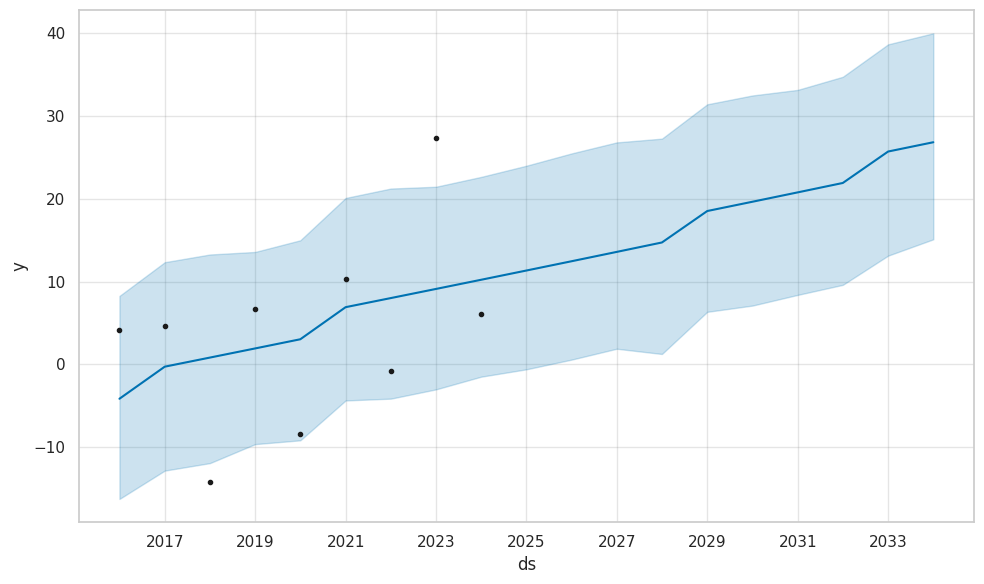

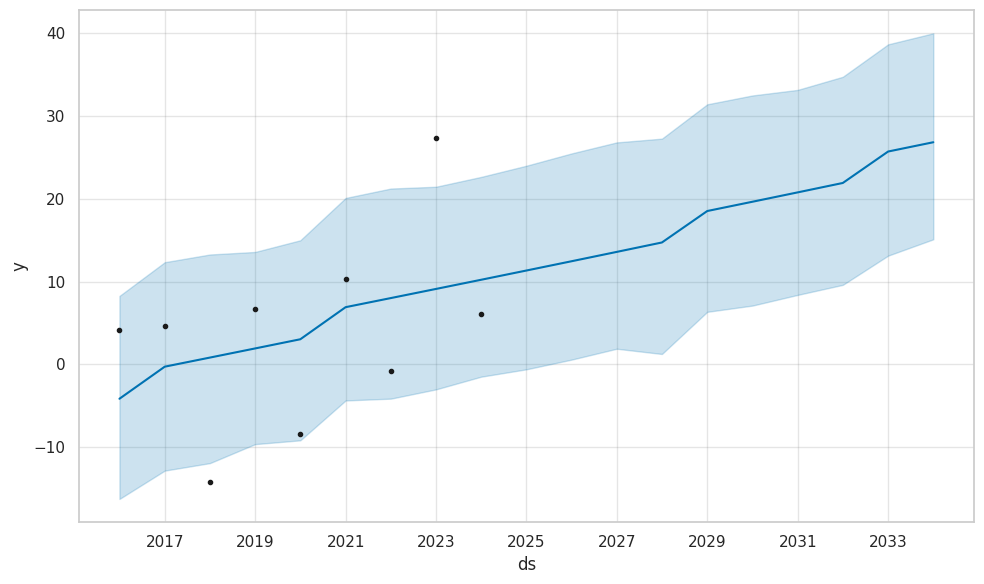

In [ ]:
# Install the correct package
!pip install prophet

# Import Prophet correctly
from prophet import Prophet

# Prepare data for Prophet
prophet_df = urban_change_df.rename(columns={'Year2': 'ds', 'Change': 'y'})
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%Y')  # Convert 'Year2' to datetime format

# Initialize and fit the model
model = Prophet()
model.fit(prophet_df)

# Create a DataFrame for future predictions (e.g., next 10 years)
future = model.make_future_dataframe(periods=10, freq='Y')

# Predict future urbanization changes
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)

**Plotting Historical and Forecasted Values Together:**

Convert Year2 to Datetime Format:

This ensures the Year2 column is in a datetime format, necessary for proper plotting.

Plotting:

Plots the historical urbanization change data (urban_change_df) with markers and labels.

Plots the forecasted data from the Prophet model with a red line.
Adds labels, title, legend, and grid for better readability.

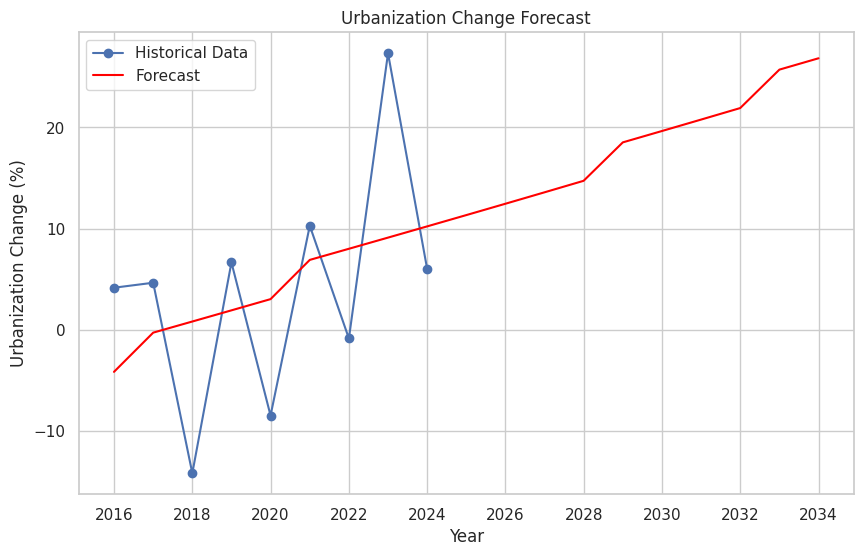

In [ ]:
import matplotlib.pyplot as plt

# Ensure 'Year2' column is in datetime format
urban_change_df['Year2'] = pd.to_datetime(urban_change_df['Year2'], format='%Y')

# Example of plotting forecasted values
plt.figure(figsize=(10, 6))

# Plot historical data with proper datetime axis
plt.plot(urban_change_df['Year2'], urban_change_df['Change'], marker='o', label='Historical Data')

# Plot forecasted data
plt.plot(forecast['ds'], forecast['yhat'], color='red', label='Forecast')

plt.xlabel('Year')
plt.ylabel('Urbanization Change (%)')
plt.title('Urbanization Change Forecast')
plt.legend()
plt.grid(True)  # Add grid for better readability
plt.show()
